## Basic Stock Analysis 
#### Bryant Crocker 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ffn
import holoviews as hv
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import display
init_notebook_mode(connected=True)
%matplotlib inline
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In order to pull in daily stock prices I will use the ffn library. The ffn library pulls in data from yahoo finance.  I will start on the first of Janauary 2010.  A few years after the 2008 recession.


I am looking at:

* Under Armour - UAA

* Nike - NKE 

* Adidas - ADS

* Vans Footwear Company - VFC


In [2]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('nke,ads,vfc,uaa', start='2010-01-01')
#Use the pd.head() method to get an idea of what the data looks like
prices.head()

nke        ads        vfc      uaa
Date                                                
2010-01-04  12.217500  64.652290  11.234499  3.51000
2010-01-05  12.266110  64.779861  11.448840  3.61500
2010-01-06  12.191328  65.103653  11.402914  3.69500
2010-01-07  12.310980  65.702194  11.623373  3.65125
2010-01-08  12.286675  66.408684  11.562134  3.64375

A simple plot of historical prices.  Their seems to be a fair deal of variabilty around the price of Adidas. 

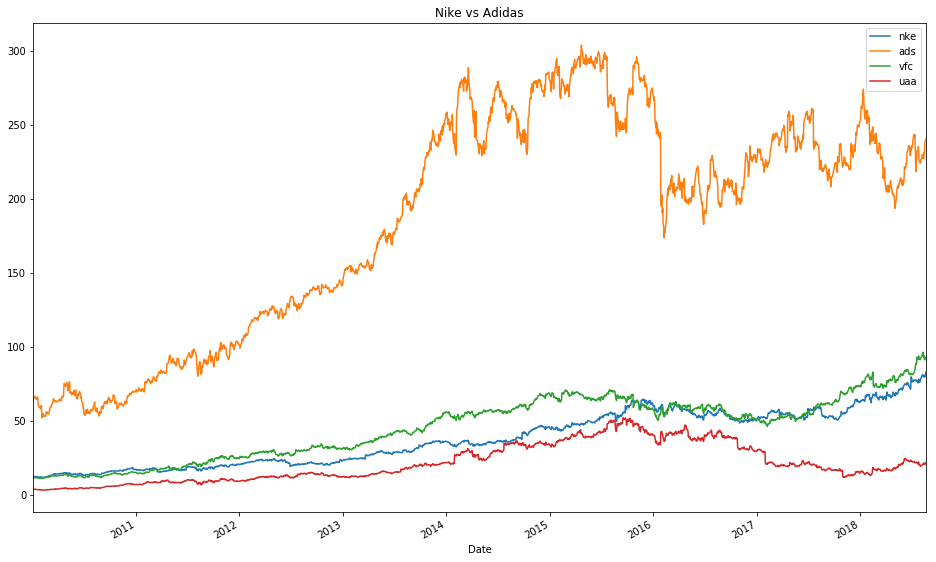

In [3]:
#plot a simply line plot to show the prices of the two assets over time.

prices[['nke', 'ads','vfc','uaa']].plot(figsize=(16,10))
plt.legend()
plt.title("Nike vs Adidas")
plt.show()

Under armour has the highest returns on average.  Note that the x-axis of the histograms are not on the same scale.

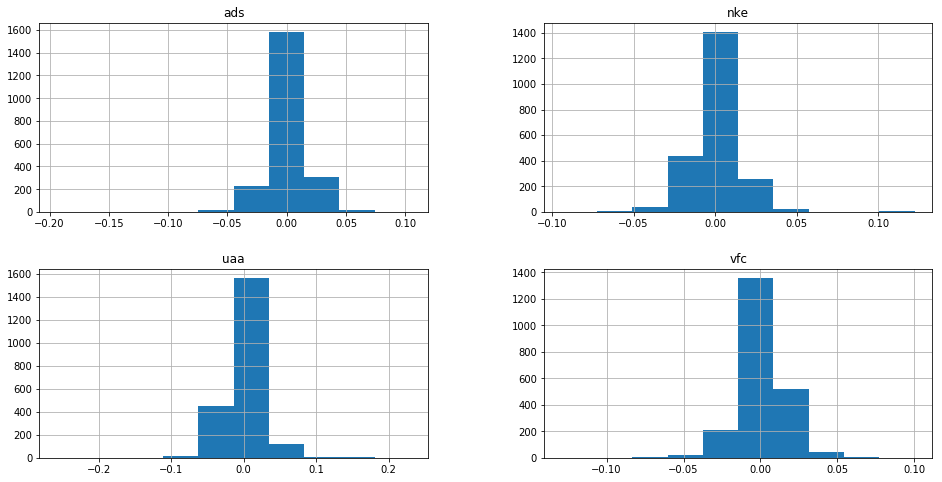

In [4]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(16,8))

nke    0.000992
ads    0.000752
vfc    0.001084
uaa    0.001174
dtype: float64

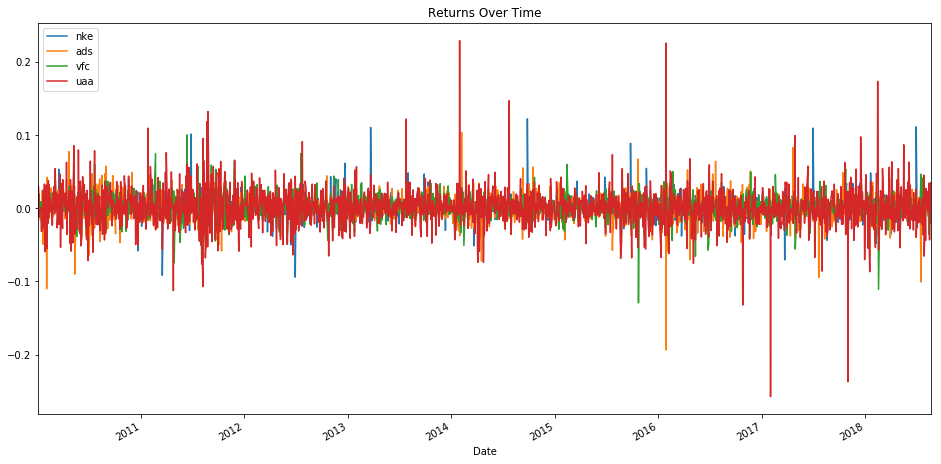

In [5]:
returns.plot(figsize=(16,8))
plt.title("Returns Over Time")
returns.mean()

#  Forecasts:

To forcast future closing values of the selected securities, I will use the Facebook's *prophet* forecasting api.  Prophet fits a general additive model using time series data.   

## Under Armor 

In [6]:
UnderArmor = prices['uaa']

In [7]:
UnderArmor = pd.DataFrame(UnderArmor).reset_index().rename(columns={"Date": "ds", "uaa": "y"})
#UnderArmor['y'] = UnderArmor['y'].to_returns()

In [8]:
from fbprophet import Prophet

m = Prophet()
m.fit(UnderArmor)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
2534 2019-08-17  7.659176    2.046691   13.597432
2535 2019-08-18  7.580420    2.274580   13.312826
2536 2019-08-19  7.377387    1.703670   13.276348
2537 2019-08-20  7.249006    1.918176   13.057890
2538 2019-08-21  7.167864    1.606837   12.963553

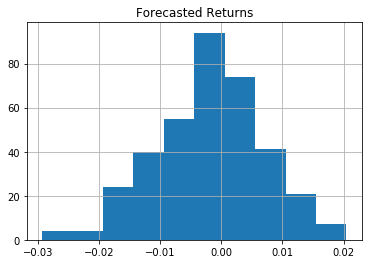

In [9]:
today = pd.to_datetime('today')
UnderArmorf = forecast[forecast.ds > today]
UnderArmorf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

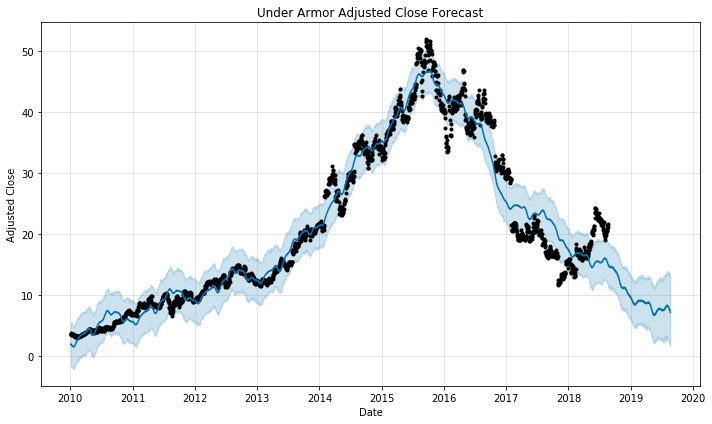

In [10]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Under Armor Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("UnderArmor.png")
plt.show()

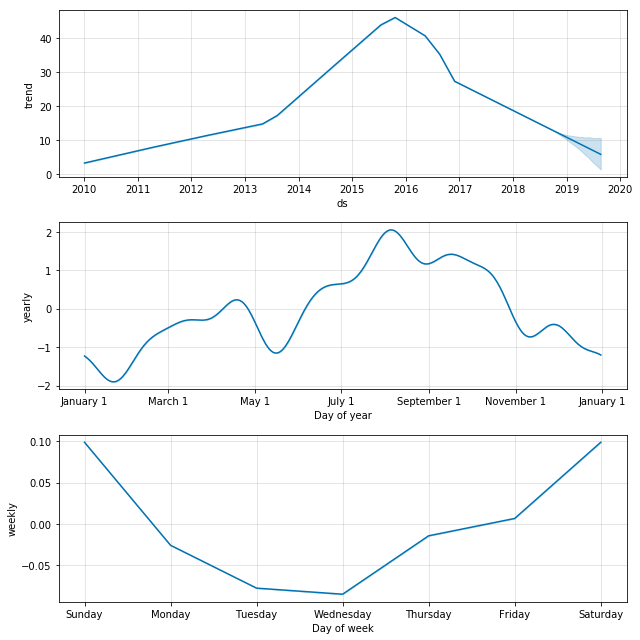

In [11]:
# Python
fig2 = m.plot_components(forecast)

In [12]:
iplot([
    go.Scatter(x=UnderArmor['ds'], y=UnderArmor['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

# Nike Forecast 

In [13]:
Nike = prices['nke']
Nike = pd.DataFrame(Nike).reset_index().rename(columns={"Date": "ds", "nke": "y"})
m = Prophet()
m.fit(Nike)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       yhat  yhat_lower  yhat_upper
2534 2019-08-17  87.381771   78.860525   95.498067
2535 2019-08-18  87.332784   78.967293   96.218154
2536 2019-08-19  87.300456   78.594504   95.697348
2537 2019-08-20  87.204243   78.656029   95.301517
2538 2019-08-21  87.104641   78.624610   95.312052

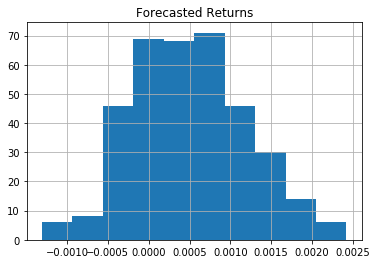

In [14]:
today = pd.to_datetime('today')
Nikef = forecast[forecast.ds > today]
Nikef['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

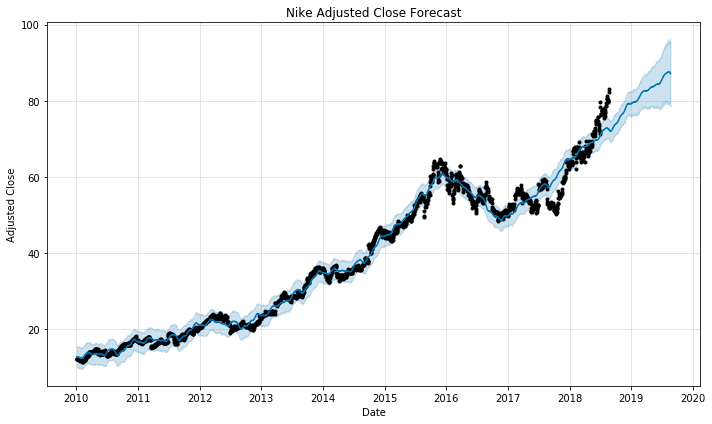

In [15]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Nike Adjusted Close Forecast")
plt.savefig('nike.png')
plt.tight_layout()
plt.show()

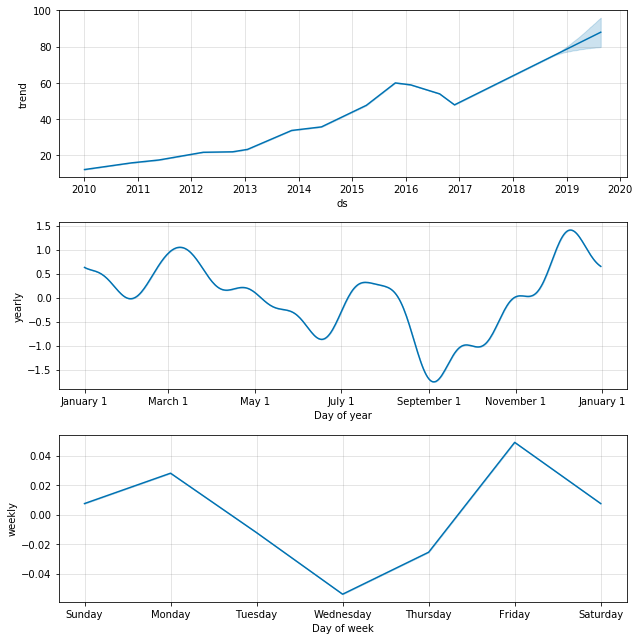

In [16]:
# Python
fig2 = m.plot_components(forecast)

In [17]:
iplot([
    go.Scatter(x=Nike['ds'], y=Nike['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

# Adidas Forecast

In [18]:
Adidas = prices['ads']
Adidas = pd.DataFrame(Adidas).reset_index().rename(columns={"Date": "ds", "ads": "y"})
Adidas['y'] = np.log(Adidas['y'])
m = Prophet()
m.fit(Adidas)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
2534 2019-08-17  5.441035    5.043653    5.827226
2535 2019-08-18  5.439016    5.034951    5.825197
2536 2019-08-19  5.375713    4.966758    5.771615
2537 2019-08-20  5.373344    4.971946    5.743782
2538 2019-08-21  5.372590    4.970728    5.764256

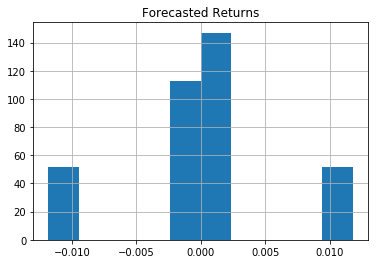

In [19]:
today = pd.to_datetime('today')
Adidasf = forecast[forecast.ds > today]
Adidasf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

In [20]:
forecast.set_index('ds', inplace = True)
forecast2 = np.expm1(forecast[['yhat', 'yhat_lower', 'yhat_upper']])
forecast2.reset_index(inplace = True)
forecast2.head()

ds       yhat  yhat_lower  yhat_upper
0 2010-01-04  59.132040   55.395938   63.437010
1 2010-01-05  59.264633   55.309903   63.322243
2 2010-01-06  59.476897   55.614860   63.468294
3 2010-01-07  59.618220   55.750930   63.553031
4 2010-01-08  59.688640   55.959418   63.987871

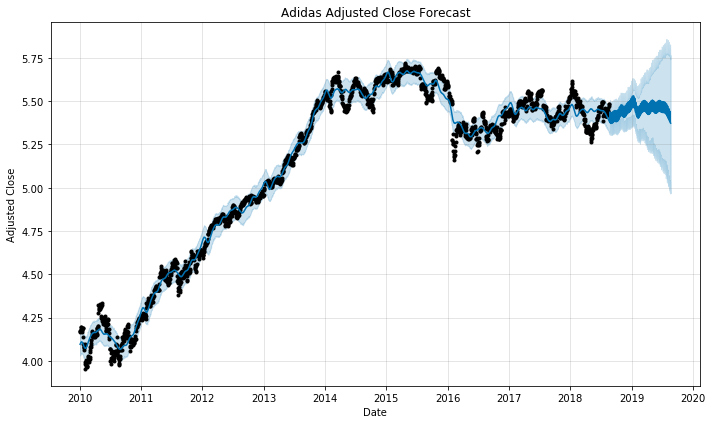

In [21]:
fig1 = m.plot(forecast.reset_index())
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Adidas Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("Adidas.png")
plt.show()

In [22]:
Adidas['y'] = np.expm1(Adidas['y'])
iplot([
    go.Scatter(x=Adidas['ds'], y=Adidas['y'], name='Adjusted Closing Price'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat'], name='Estimate'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat_upper'], fill='tonexty', mode='none', name='Upper CI'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat_lower'], fill='tonexty', mode='none', name='Lower CI')
    #go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

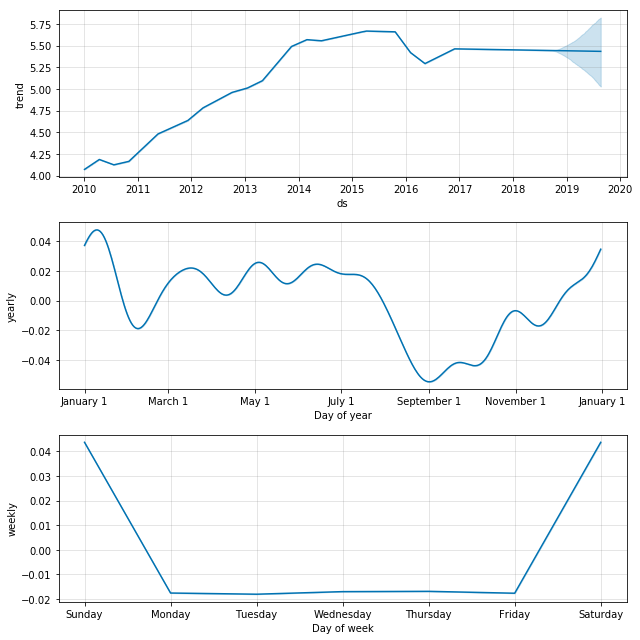

In [23]:
# Python
fig2 = m.plot_components(forecast.reset_index())

# Vans Footwear Forecast

In [24]:
Vans = prices['vfc']
Vans = pd.DataFrame(Vans).reset_index().rename(columns={"Date": "ds", "vfc": "y"})
m = Prophet()
m.fit(Vans)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds        yhat  yhat_lower  yhat_upper
2534 2019-08-17  111.484495   96.574234  125.880040
2535 2019-08-18  111.465070   96.911782  125.995483
2536 2019-08-19  111.981752   97.416544  126.232312
2537 2019-08-20  111.985973   97.051856  126.613489
2538 2019-08-21  111.963370   96.344762  127.846855

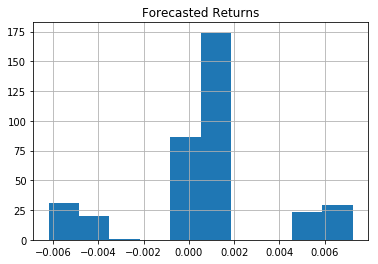

In [25]:
today = pd.to_datetime('today')
vansf = forecast[forecast.ds > today]
vansf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

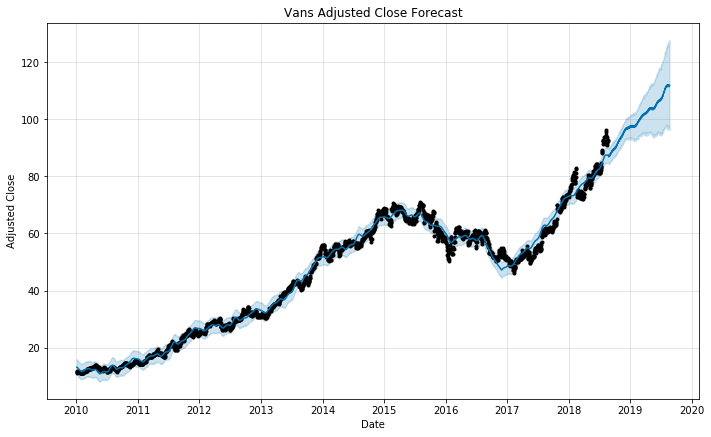

In [26]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Vans Adjusted Close Forecast")
plt.savefig("vans.png")
plt.show()

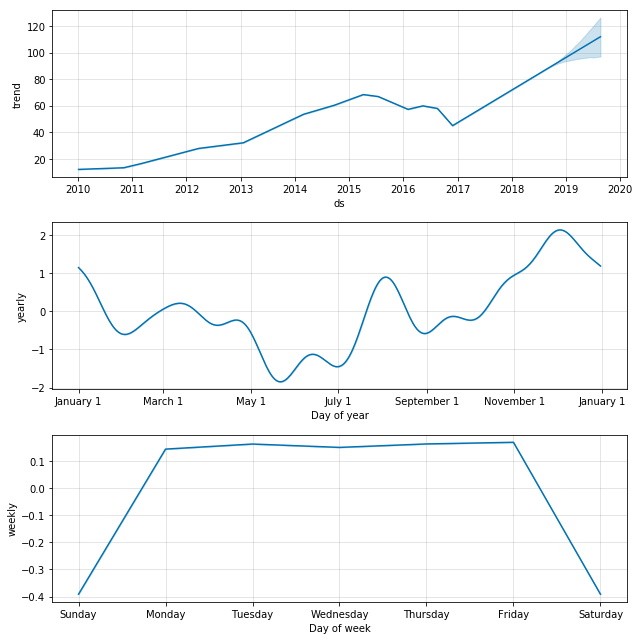

In [27]:
# Python
fig2 = m.plot_components(forecast)

In [28]:
iplot([
    go.Scatter(x=Vans['ds'], y=Vans['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

In [29]:
Vans.head()

ds          y
0 2010-01-04  11.234499
1 2010-01-05  11.448840
2 2010-01-06  11.402914
3 2010-01-07  11.623373
4 2010-01-08  11.562134